In [2]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:

#load the dataset
retail_df = pd.read_csv("SampleSuperstore.csv")
retail_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#shape of our dataset
print("The shape of our dataset is: ", retail_df.shape)

The shape of our dataset is:  (9994, 13)


In [5]:
#showing 10 rows for checking the data 
retail_df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [6]:
#10 rows from below of the data 
retail_df.tail(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9984,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240,1,0.0,15.2208
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
#checking the information of the data 
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#exploring the unique values of each attribute
print("Number of transactions: ", retail_df['Postal Code'].nunique())
print("Number of region: ",retail_df['Region'].nunique())
print("Number of profit:", retail_df['Profit'].nunique() )
print("Percentage of Profit : ", round(retail_df['Profit'].isnull().sum() * 100 / len(retail_df),2),"%" )
print('Number of countries: ',retail_df['Country'].nunique())

Number of transactions:  631
Number of region:  4
Number of profit: 7287
Percentage of Profit :  0.0 %
Number of countries:  1


In [9]:
#grouping the profit and quantity
groupby_Quantity= pd.DataFrame(retail_df.groupby('Profit')['Quantity'].nunique())
groupby_Quantity.head()

,Quantity
Profit,
-6599.9780,1
-3839.9904,1
-3701.8928,1
-3399.9800,1
-2929.4845,1


In [10]:
groupby_Quantity.describe()

,Quantity
count,7287.000000
mean,1.038013
std,0.224272
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,10.000000


In [11]:
#get cancelled transactions
cancelled_orders = retail_df[retail_df['Postal Code'].astype(str).str.contains('5')]
cancelled_orders.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
16,Standard Class,Consumer,United States,Madison,Wisconsin,53711,Central,Office Supplies,Storage,665.880,6,0.0,13.3176
21,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Art,19.460,7,0.0,5.0596
22,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884
24,Standard Class,Consumer,United States,Orem,Utah,84057,West,Furniture,Tables,1044.630,3,0.0,240.2649
34,Second Class,Home Office,United States,Houston,Texas,77095,Central,Office Supplies,Paper,29.472,3,0.2,9.9468


In [12]:
#search for transaction where quantity == -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [13]:
#search for transaction where quantity>0

cancelled_orders[cancelled_orders['Quantity']>0]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
16,Standard Class,Consumer,United States,Madison,Wisconsin,53711,Central,Office Supplies,Storage,665.880,6,0.0,13.3176
21,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Art,19.460,7,0.0,5.0596
22,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884
24,Standard Class,Consumer,United States,Orem,Utah,84057,West,Furniture,Tables,1044.630,3,0.0,240.2649
34,Second Class,Home Office,United States,Houston,Texas,77095,Central,Office Supplies,Paper,29.472,3,0.2,9.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Technology,Phones,97.980,2,0.0,27.4344
9984,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964


In [14]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = retail_df['Profit'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have  3220  cancelled orders.
Percentage of orders canceled: 3220/7287 (44.19%) 


In [15]:
# get unique postal code per sales
groupby_sales = pd.DataFrame(retail_df.groupby('Sales')['Postal Code'].nunique())
groupby_sales.head()

,Postal Code
Sales,
0.444,1
0.556,1
0.836,1
0.852,1
0.876,1


In [16]:

groupby_sales.describe()

,Postal Code
count,5825.000000
mean,1.689785
std,1.683919
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,45.000000


In [17]:
#grouping dales and discount
groupby_discount = pd.DataFrame(retail_df.groupby('Sales')['Discount'].nunique())
groupby_discount.columns=['Quantity']
groupby_discount.head()

,Quantity
Sales,
0.444,1
0.556,1
0.836,1
0.852,1
0.876,1


In [18]:
groupby_discount.describe()

,Quantity
count,5825.000000
mean,1.085494
std,0.294590
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


In [19]:
#
retail_df.groupby(['Quantity','Category'])['Discount'].nunique().describe()

count    42.000000
mean      5.476190
std       2.915376
min       2.000000
25%       3.250000
50%       4.500000
75%       7.000000
max      11.000000
Name: Discount, dtype: float64

In [20]:
retail_df['Country'] = retail_df['Quantity'] * retail_df['Profit']

In [21]:
retail_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,83.8272,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,658.7460,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,13.7428,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,-1915.1550,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,5.0328,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


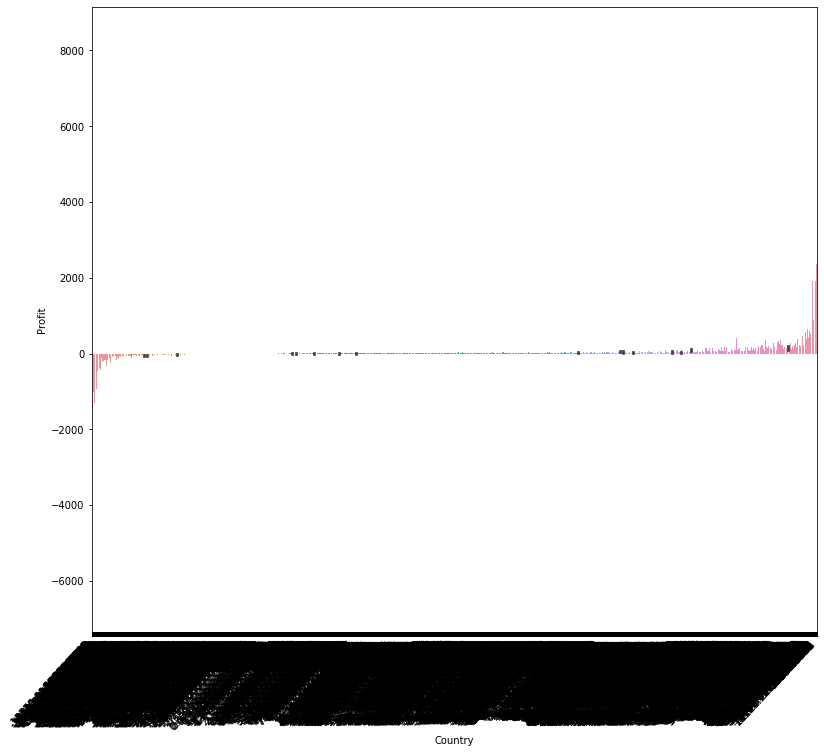

In [22]:
#What's the total revenue per country?
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Profit',data=retail_df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [23]:
retail_df.groupby('Country').sum().sort_values(by='Sales', ascending=False)
retail_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,83.8272,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,658.7460,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,13.7428,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,-1915.1550,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,5.0328,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [24]:
retail_df[retail_df['Country']=='United Kingdom']['Quantity'].nunique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0

In [26]:
retail_uk = retail_df[retail_df['Country']=='United Kingdom']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Country,Postal Code,Sales,Quantity,Discount,Profit
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
retail_uk.describe()

,Country,Postal Code,Sales,Quantity,Discount,Profit
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN
